Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')
        City         ds   y  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad 2015-01-01 NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad 2015-01-02 NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad 2015-01-03 NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad 2015-01-04 NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad 2015-01-05 NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpag6soe3m/yl9b2m7f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpag6soe3m/84zvfrkh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77547', 'data', 'file=/tmp/tmpag6soe3m/yl9b2m7f.json', 'init=/tmp/tmpag6soe3m/84zvfrkh.json', 'output', 'file=/tmp/tmpag6soe3m/prophet_model8utgwxlu/prophet_model-20240928072146.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


                      ds
2369 2020-07-16 01:00:00
2370 2020-07-16 02:00:00
2371 2020-07-16 03:00:00
2372 2020-07-16 04:00:00
2373 2020-07-16 05:00:00
                      ds       yhat  yhat_lower  yhat_upper
2369 2020-07-16 01:00:00  11.531364  -63.481737   83.538738
2370 2020-07-16 02:00:00  11.499013  -59.907641   78.174446
2371 2020-07-16 03:00:00  11.467043  -54.274787   84.775742
2372 2020-07-16 04:00:00  11.435370  -56.487669   83.329929
2373 2020-07-16 05:00:00  11.403906  -62.086156   79.823837


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

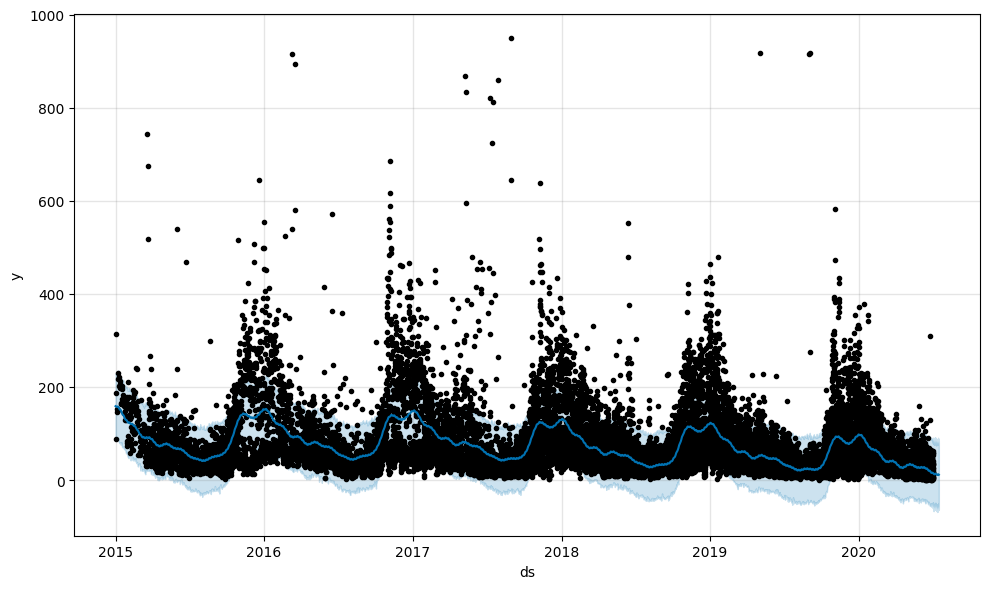

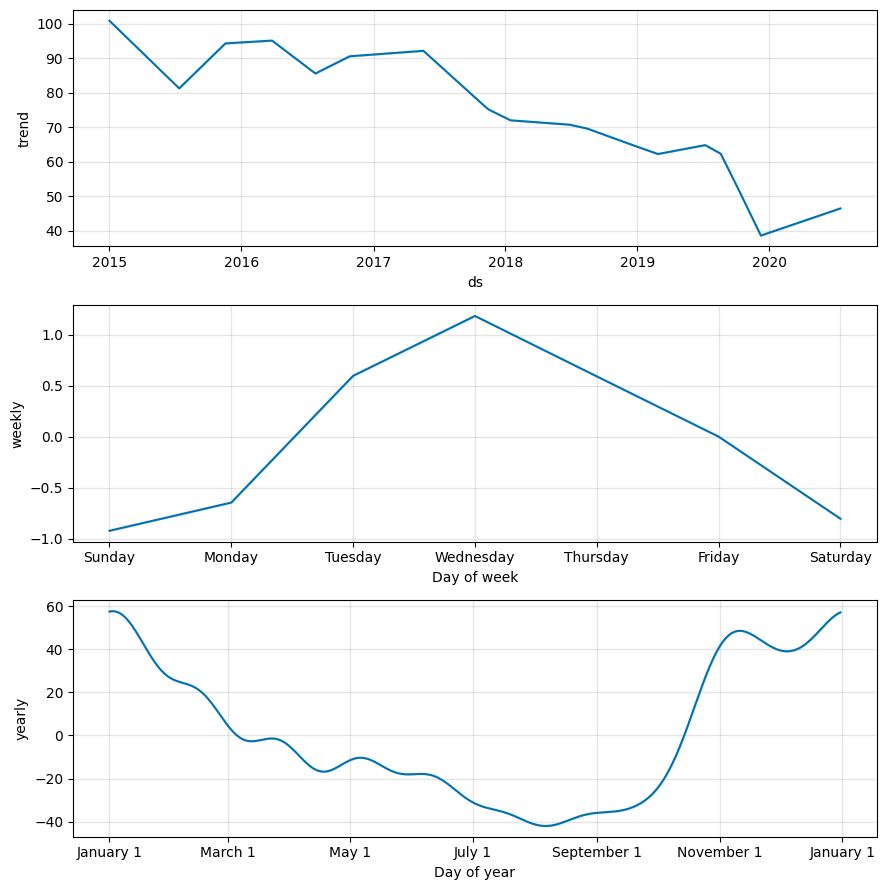

In [3]:
import numpy as np
import pandas as pd
from prophet import Prophet

# Load the data from a CSV file
air_quality_data = pd.read_csv("city_day.csv.zip")

# Inspect the DataFrame's columns
print(air_quality_data.columns)

# Rename columns
air_quality_data.rename(columns={'Date': 'ds', 'PM2.5': 'y'}, inplace=True)  # Choose the appropriate column for 'y'
air_quality_data['ds'] = pd.to_datetime(air_quality_data['ds'])  # Convert to datetime

# Check the DataFrame structure after renaming
print(air_quality_data.head())

# Initialize and fit the Prophet model
model = Prophet()
model.fit(air_quality_data)

# Create a DataFrame to hold predictions for the next 365 hours
future = model.make_future_dataframe(periods=365, freq='H')

# Display the last few rows of the future DataFrame
print(future.tail())

# Make predictions
forecast = model.predict(future)

# Display the last few rows of the forecast
print(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail())

fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)